# Exercise 1

We first load a dataset and examine its dimensions.

In [43]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [44]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

x =np.shape(xy_data)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

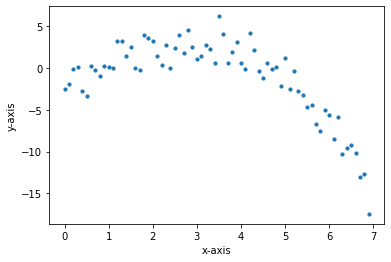

In [45]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

data_x = xy_data[:,0]
data_y = xy_data[:,1]

plt.scatter(data_x, data_y, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [46]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector 
    # beta, the fit, and the vector of residuals

    data_x = data_matrix[:,0]
    data_y = data_matrix[:,1]

    all_ones = np.ones(np.shape(data_x))

    N = np.shape(data_matrix)[0]

    if k >= N:
        k = N - 1
    
    else:
        k = k
    
    data_x_array = []
    for i in range(k+1): # working it out for every vaule of k
            x_calc = data_x ** i
            if i == 0:
                 data_x_array.append(all_ones)
            else:
                 data_x_array.append(x_calc)
            
    x2_trans = np.vstack(data_x_array)
    x2 = np.transpose(x2_trans)

    beta_poly = np.linalg.lstsq(x2, data_y, rcond=None)[0]
    fit_poly = x2.dot(beta_poly)
    resid = data_y - fit_poly
    

    return beta_poly, fit_poly, resid

Use the tests below to check the outputs of the function you have written:

In [47]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

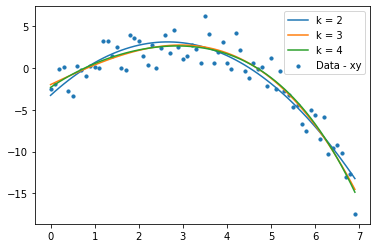

SSE_2 =  172.18 R_2^2 =  0.8876
SSE_3 =  152.41 R_3^2 =  0.9005
SSE_4 =  151.23 R_4^2 =  0.9013


In [48]:
#Your code here
[beta_2, fit_2, resid_2] = polyreg(xy_data, 2)
[beta_3, fit_3, resid_3] = polyreg(xy_data, 3)
[beta_4, fit_4, resid_4] = polyreg(xy_data, 4)
all_ones = np.ones(np.shape(data_x))
fit_0 = np.mean(data_y) * all_ones

plt.scatter(data_x, data_y, s=10, label = 'Data - xy')
plt.plot(data_x, fit_2, label = 'k = 2')
plt.plot(data_x, fit_3, label = 'k = 3')
plt.plot(data_x, fit_4, label = 'k = 4')
plt.legend()
plt.show()

SSE_0 = np.linalg.norm(data_y - fit_0)**2
SSE_2 = np.linalg.norm(data_y - fit_2)**2
SSE_3 = np.linalg.norm(data_y - fit_3)**2
SSE_4 = np.linalg.norm(data_y - fit_4)**2

R_2 = 1 - SSE_2 / SSE_0
R_3 = 1 - SSE_3 / SSE_0
R_4 = 1 - SSE_4 / SSE_0

print('SSE_2 = ', np.round_(SSE_2, 2), 'R_2^2 = ', np.round(R_2, decimals = 4))
print('SSE_3 = ', np.round_(SSE_3, 2), 'R_3^2 = ', np.round(R_3, decimals = 4))
print('SSE_4 = ', np.round_(SSE_4, 2), 'R_4^2 = ', np.round(R_4, decimals = 4))

 #### State which model you choose and briefly justify your choice.
 
 
For the data range given, it can be seen that k = 4 is the best. This is because the error is the lowest (SSE), and the coefficient of determination (R^2) is the highest. This means that k = 4 is the best performing polynomial. 
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

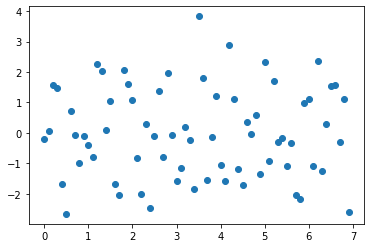

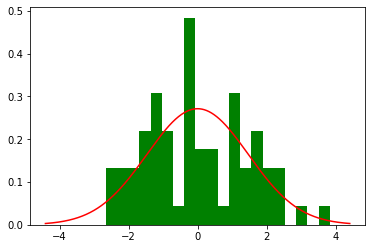

In [49]:
#Your code here
#plotting a scatter of resid_4 from above

plt.scatter(data_x, resid_4)
plt.show()

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_4, bins = 20, density = True, facecolor = 'green');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm

res_stdev = np.std(resid_4)  #standard deviation of residuals
xvals = np.linspace(-3 * res_stdev, 3 * res_stdev, 1000)
plt.plot(xvals, norm.pdf(xvals, loc = 0, scale = res_stdev), 'r')
plt.show()